In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt, argparse, numpy as np, math, sys, copy
from skimage.segmentation import slic, mark_boundaries, felzenszwalb
from skimage.util import img_as_float
from skimage import io
import numpy as np
import superpixels as sp
import glob
import pipeline as pipe
import time
import superpixels as sp
import scipy.stats as sci
from PIL import Image
from scipy import ndimage
import cv2

In [4]:
data_path = '/home/falreis/Me/deep_learning/segmentation-eval/code/datasets/data_road/falreis/'
save_path = '/home/falreis/Me/deep_learning/segmentation-eval/code/datasets/slic/'

### Read Images

In [5]:
data_types = ['train'] #, 'test', 'train_ground']
extension = 'png'

image_names, names = [], []

for data_type in data_types:
    image_path = data_path + data_type + '/'
    names_path = save_path + data_type + '/'
        
    len_path = len(image_path)
    image_files = glob.glob(image_path + '*.' + extension)
    image_filenames = [x[len_path:-4] for x in image_files]

    #load images
    for filename in image_filenames:
        file = image_path + filename + '.' + extension

        #append image and groundtruths
        image_names.append(file)
        names.append(names_path + filename + '_&&&.png')

print(len(image_names), len(names))

289 289


In [6]:
image = io.imread(image_names[0])
print(image.shape)

(375, 1242, 3)


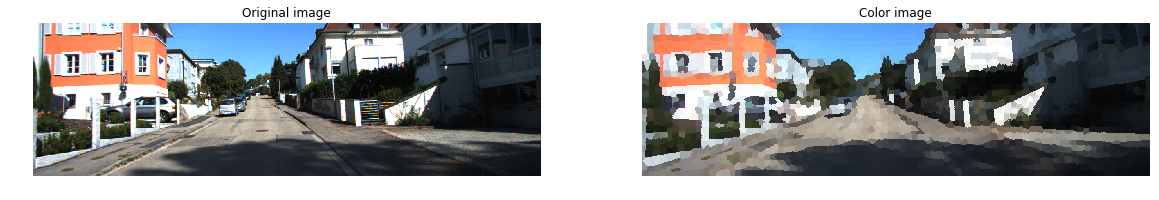

In [7]:
slic_seg = slic(image, n_segments = 2048, slic_zero = True)
color_image, _, _ = sp.color_superpixel(image, slic_seg)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 20))
ax1.imshow(image)
ax1.set_title("Original image")
ax1.set_axis_off()
ax2.imshow(color_image)
ax2.set_title("Color image")
ax2.set_axis_off()
plt.show()

## Data Augmentation

In [ ]:
index = 0
len_images = len(names)

for image_name, name in zip(image_names, names):
    index += 1

    image = io.imread(image_name)
    
    prefix_name = name[:-4]
    extension_name = name[-4:]

    #rotate image (uncomment for BSDS)
    #if(image.shape[0] != 321):
    #    image = ndimage.rotate(image, 90)
        
    flip_types = ['noflip', 'fliplr', 'flipud']
    
    for flip_type in flip_types:
        if flip_type == 'fliplr':
            flip_image = np.fliplr(image)
        elif flip_type == 'flipud':
            flip_image = np.flipud(image)
        else:
            flip_image = image
        
        #save image 0
        save_name = prefix_name.replace("&&&", ('_' + flip_type + '_0'))
        save_name = (save_name + extension_name)
        io.imsave(save_name, flip_image)
    
    print(index, '/', len_images, end='')
    print('\r', end='')

print('OK!')

## Data Augmentation - SLIC

In [10]:
index = 0
len_images = len(names)

for image_name, name in zip(image_names, names):
    index += 1

    original_image = io.imread(image_name)
    
    slic_seg = slic(original_image, n_segments = 4096, slic_zero = True)
    image, _, _ = sp.color_superpixel(original_image, slic_seg)
    
    prefix_name = name[:-4]
    extension_name = name[-4:]
        
    flip_types = ['noflip', 'fliplr']
    
    for flip_type in flip_types:
        if flip_type == 'fliplr':
            flip_image = np.fliplr(image)
        elif flip_type == 'flipud':
            flip_image = np.flipud(image)
        else:
            flip_image = image
        
        #save image 0
        save_name = prefix_name.replace("&&&", ('_' + flip_type + '_0'))
        save_name = (save_name + extension_name)
        io.imsave(save_name, flip_image)
    
    print(index, '/', len_images, end='')
    print('\r', end='')

print('OK!')

OK! / 289


## Lot of data augmentation

In [ ]:
index = 0
len_images = len(names)
for image_name, name in zip(image_names, names):
    index += 1

    black_image = np.zeros(DEFAULT_IMG_SIZE,dtype=np.uint8)
    image = io.imread(image_name)
    
    prefix_name = name[:-4]
    extension_name = name[-4:]

    if(image.shape[0] == 321):
        black_image[80:401,:,:] = image[:,:,:]
    else:
        black_image[:,80:401,:] = image[:,:,:]
        
    flip_types = ['noflip', 'fliplr']
    
    for flip_type in flip_types:
        if flip_type == 'fliplr':
            flip_image = np.fliplr(image)
            flip_black = np.fliplr(black_image)
        elif flip_type == 'flipud':
            flip_image = np.flipud(image)
            flip_black = np.flipud(black_image)
        else:
            flip_black = black_image
            flip_image = image
        
        #save image 0
        save_name = prefix_name.replace("&&&", ('_' + flip_type + '_0'))
        save_name = (save_name + extension_name)
        io.imsave(save_name, flip_black)

        #rotate image and save
        for angle in range(30, 360, 30):
            rot_image = ndimage.rotate(flip_image, angle)
            res_image = cv2.resize(rot_image, dsize=DEFAULT_IMG_SIZE[:2], interpolation=cv2.INTER_CUBIC)

            save_name = prefix_name.replace("&&&", ('_' + flip_type + '_' + str(angle)))
            save_name = (save_name + extension_name)
            io.imsave(save_name, res_image)
    
    print(index, '/', len_images, end='')
    print('\r', end='')

print('OK!')